# 🎯 Feature Engineering Pipeline для EUR/USD

## 📋 Цель
Создание технических и статистических признаков для валютной пары EUR/USD и сохранение в формате Parquet.

## 🎯 План выполнения
1. **Импорт библиотек и настройка**
2. **Загрузка и предобработка данных**
3. **Создание технических индикаторов**
4. **Создание статистических признаков**
5. **Создание лаг-признаков**
6. **Валидация и сохранение данных**
7. **Анализ созданных признаков**

## 📊 Ожидаемый результат
- **~35 технических индикаторов**
- **~55 статистических фич**
- **~120 лаг-фич**
- **Итого: ~210+ новых признаков!**


## 1. 📚 Импорт библиотек и настройка


In [3]:
import sys
import os
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Добавляем путь к исходникам
project_root = Path().resolve().parent.parent
sys.path.append(str(project_root / '03_src'))

print(f"Корневая папка проекта: {project_root}")
print(f"Python version: {sys.version}")


Корневая папка проекта: C:\Users\Shchurov\Хранилище\Документы\05_Программирование\02_projects\personal\trading_predictor
Python version: 3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)]


In [ ]:
# Основные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
import os

# Наши модули
try:
    from features import FeatureEngineeringPipeline  # type: ignore[reportMissingImports]
    
    print("✅ Модули feature engineering успешно импортированы")
except ImportError as e:
    print(f"❌ Ошибка импорта модулей: {e}")
    print("Убедитесь, что все файлы созданы в 03_src/features/")


✅ Модули feature engineering успешно импортированы


In [6]:
# Настройка отображения
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

# Настройка графиков
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Настройки применены")


✅ Настройки применены


## 2. 📊 Загрузка и предобработка данных


In [5]:
# Использование FeatureEngineeringPipeline для простого запуска
print("🚀 БЫСТРЫЙ СТАРТ С ПАЙПЛАЙНОМ")
print("=" * 40)

# Настраиваем правильные пути (запускаем из notebook, а пути в конфиге от корня проекта)
import os
os.chdir(project_root)  # Меняем рабочую директорию на корень проекта
print(f"Текущая рабочая директория: {os.getcwd()}")

# Проверяем наличие файла данных
data_file = "01_data/raw/EURUSD_2010-2024_H1_OANDA.csv"
if os.path.exists(data_file):
    print(f"✅ Файл данных найден: {data_file}")
else:
    print(f"❌ Файл не найден: {data_file}")
    raise FileNotFoundError(f"Требуемый файл данных не найден: {data_file}")

# Инициализация пайплайна
pipeline = FeatureEngineeringPipeline(profile="full")
print("✅ Pipeline инициализирован")

# Запуск полного пайплайна с указанием файла
print("\nЗапуск полного Feature Engineering...")
df_with_features, stats = pipeline.run_full_pipeline(input_path=data_file)

print(f"\n🎯 КРАТКИЙ РЕЗУЛЬТАТ:")
print(f"✅ Pipeline завершен успешно!")
print(f"📊 Создано {stats['created_features']} новых признаков")
print(f"💾 Данные сохранены в Parquet формате")


2025-08-08 13:20:56 - FeatureEngineering - INFO - ============================================================
2025-08-08 13:20:56 - FeatureEngineering - INFO - STARTING FULL FEATURE ENGINEERING PIPELINE
2025-08-08 13:20:56 - FeatureEngineering - INFO - ============================================================
2025-08-08 13:20:56 - FeatureEngineering - INFO - Loading data from: 01_data/raw/EURUSD_2010-2024_H1_OANDA.csv
2025-08-08 13:20:57 - FeatureEngineering - INFO - Data loaded successfully. Shape: (88630, 6)
2025-08-08 13:20:57 - FeatureEngineering - INFO - Validating and preparing data...
2025-08-08 13:20:57 - FeatureEngineering - INFO - Auto-mapped columns: {'time': 'Time', 'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'volume': 'Volume'}


🚀 БЫСТРЫЙ СТАРТ С ПАЙПЛАЙНОМ
Текущая рабочая директория: C:\Users\Shchurov\Хранилище\Документы\05_Программирование\02_projects\personal\trading_predictor
✅ Файл данных найден: 01_data/raw/EURUSD_2010-2024_H1_OANDA.csv
✅ Pipeline инициализирован

Запуск полного Feature Engineering...


2025-08-08 13:20:57 - FeatureEngineering - INFO - Time column converted to datetime index
2025-08-08 13:20:57 - FeatureEngineering - INFO - Data validation completed. Final shape: (88630, 5)
2025-08-08 13:20:57 - FeatureEngineering - INFO - Starting feature creation process...
2025-08-08 13:20:57 - FeatureEngineering - INFO - Creating technical indicators...
2025-08-08 13:20:59 - FeatureEngineering - INFO - Added 32 technical indicators
2025-08-08 13:20:59 - FeatureEngineering - INFO - Creating statistical features...
2025-08-08 13:30:10 - FeatureEngineering - INFO - Added 58 statistical features
2025-08-08 13:30:10 - FeatureEngineering - INFO - Creating lag features...
2025-08-08 13:34:09 - FeatureEngineering - INFO - Added 87 lag features
2025-08-08 13:34:09 - FeatureEngineering - INFO - Handling missing values...
2025-08-08 13:34:09 - FeatureEngineering - INFO - Initial missing values: 2,797 (0.02%)
2025-08-08 13:34:09 - FeatureEngineering - INFO - Keeping all rows including those w


🎯 КРАТКИЙ РЕЗУЛЬТАТ:
✅ Pipeline завершен успешно!
📊 Создано 177 новых признаков
💾 Данные сохранены в Parquet формате


## 3. 📈 Анализ созданных признаков


In [6]:
# Детальный анализ созданных признаков
print("📊 АНАЛИЗ СОЗДАННЫХ ПРИЗНАКОВ")
print("=" * 40)

# Базовая информация
print(f"Форма данных: {df_with_features.shape}")
print(f"Период данных: {df_with_features.index.min()} до {df_with_features.index.max()}")
print(f"Размер в памяти: {df_with_features.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Анализ по типам признаков
tech_features = [col for col in df_with_features.columns if any(indicator in col for indicator in 
                ['EMA', 'MACD', 'RSI', 'BB_', 'ATR', 'ADX', 'CCI', 'OBV', 'Stoch'])]
stat_features = [col for col in df_with_features.columns if any(stat in col for stat in 
                ['ROC', 'Rolling', 'ZScore', 'Skew', 'Kurt', 'Volatility', 'Trend'])]
lag_features = [col for col in df_with_features.columns if 'Lag' in col or 'Seasonal' in col]

print(f"\n📋 ТИПЫ ПРИЗНАКОВ:")
print(f"Технические индикаторы: {len(tech_features)}")
print(f"Статистические признаки: {len(stat_features)}")  
print(f"Лаг-признаки: {len(lag_features)}")
print(f"Исходные данные: 5 (OHLCV)")
print(f"Итого: {len(df_with_features.columns)}")

# Проверка качества данных
missing_count = df_with_features.isnull().sum().sum()
print(f"\n🔍 КАЧЕСТВО ДАННЫХ:")
print(f"Пропущенные значения: {missing_count:,}")
print(f"Процент заполненности: {((df_with_features.shape[0] * df_with_features.shape[1] - missing_count) / (df_with_features.shape[0] * df_with_features.shape[1]) * 100):.2f}%")


📊 АНАЛИЗ СОЗДАННЫХ ПРИЗНАКОВ
Форма данных: (88630, 182)
Период данных: 2010-01-03 17:00:00+00:00 до 2023-12-29 21:00:00+00:00
Размер в памяти: 124.74 MB

📋 ТИПЫ ПРИЗНАКОВ:
Технические индикаторы: 20
Статистические признаки: 40
Лаг-признаки: 82
Исходные данные: 5 (OHLCV)
Итого: 182

🔍 КАЧЕСТВО ДАННЫХ:
Пропущенные значения: 2,797
Процент заполненности: 99.98%


## 🔍 Анализ Missing Values

Детальный анализ пропущенных значений в созданном датасете для принятия решения о дальнейшей обработке.


In [6]:
# Детальный анализ Missing Values
print("🔍 АНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ")
print("=" * 50)

# Общая статистика
total_values = df_with_features.shape[0] * df_with_features.shape[1]
missing_values = df_with_features.isnull().sum().sum()
missing_percentage = (missing_values / total_values) * 100

print(f"📊 Общая статистика:")
print(f"  • Всего значений: {total_values:,}")
print(f"  • Пропущенных значений: {missing_values:,}")
print(f"  • Процент пропусков: {missing_percentage:.2f}%")

# Анализ по строкам
rows_with_missing = df_with_features.isnull().any(axis=1).sum()
complete_rows = len(df_with_features) - rows_with_missing

print(f"\n📈 Анализ по строкам:")
print(f"  • Полные строки (без NaN): {complete_rows:,}")
print(f"  • Строки с пропусками: {rows_with_missing:,}")
print(f"  • Процент полных строк: {(complete_rows/len(df_with_features)*100):.2f}%")

# Анализ по типам признаков
original_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
tech_features = [col for col in df_with_features.columns if any(indicator in col for indicator in 
                ['EMA', 'MACD', 'RSI', 'BB_', 'ATR', 'ADX', 'CCI', 'OBV', 'Stoch', 'PSAR'])]
stat_features = [col for col in df_with_features.columns if any(stat in col for stat in 
                ['ROC', 'Rolling', 'ZScore', 'Skew', 'Kurt', 'Volatility', 'Trend'])]
lag_features = [col for col in df_with_features.columns if 'Lag' in col or 'Seasonal' in col]

feature_groups = {
    'Исходные данные (OHLCV)': original_cols,
    'Технические индикаторы': tech_features,
    'Статистические признаки': stat_features,
    'Лаг-признаки': lag_features
}

print(f"\n🎯 Анализ по типам признаков:")
for group_name, columns in feature_groups.items():
    if columns:
        group_missing = df_with_features[columns].isnull().sum().sum()
        group_total = len(columns) * len(df_with_features)
        group_percentage = (group_missing / group_total) * 100
        print(f"  • {group_name}: {group_missing:,}/{group_total:,} ({group_percentage:.2f}%)")

# Топ-10 колонок с наибольшим количеством пропусков
print(f"\n🔝 Топ-10 признаков с наибольшим количеством пропусков:")
missing_by_column = df_with_features.isnull().sum().sort_values(ascending=False)
top_missing = missing_by_column.head(10)
for col, missing_count in top_missing.items():
    if missing_count > 0:
        percentage = (missing_count / len(df_with_features)) * 100
        print(f"  • {col}: {missing_count:,} ({percentage:.2f}%)")

# Анализ по временным периодам
print(f"\n⏰ Анализ по временным периодам:")
# Первые 1000 строк (начало периода)
early_missing = df_with_features.head(1000).isnull().sum().sum()
early_total = 1000 * df_with_features.shape[1]
early_percentage = (early_missing / early_total) * 100

# Последние 1000 строк (конец периода)
late_missing = df_with_features.tail(1000).isnull().sum().sum()
late_total = 1000 * df_with_features.shape[1]
late_percentage = (late_missing / late_total) * 100

print(f"  • Первые 1000 строк: {early_missing:,}/{early_total:,} ({early_percentage:.2f}%)")
print(f"  • Последние 1000 строк: {late_missing:,}/{late_total:,} ({late_percentage:.2f}%)")

# Рекомендации
print(f"\n💡 РЕКОМЕНДАЦИИ:")
if missing_percentage < 5:
    print("  ✅ Низкий уровень пропусков (<5%) - можно удалить строки с NaN")
elif missing_percentage < 15:
    print("  ⚠️  Средний уровень пропусков (5-15%) - рассмотрите forward fill")
else:
    print("  🔥 Высокий уровень пропусков (>15%) - требуется детальный анализ")

if early_percentage > late_percentage * 2:
    print("  📊 Большинство пропусков в начале - нормально для технических индикаторов")
    print("  💡 Можно удалить первые N строк где слишком много NaN")

print(f"\n🎯 Готов для дальнейшего анализа и принятия решения!")


🔍 АНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ
📊 Общая статистика:
  • Всего значений: 16,130,660
  • Пропущенных значений: 2,948
  • Процент пропусков: 0.02%

📈 Анализ по строкам:
  • Полные строки (без NaN): 88,325
  • Строки с пропусками: 305
  • Процент полных строк: 99.66%

🎯 Анализ по типам признаков:
  • Исходные данные (OHLCV): 0/443,150 (0.00%)
  • Технические индикаторы: 707/1,861,230 (0.04%)
  • Статистические признаки: 612/3,545,200 (0.02%)
  • Лаг-признаки: 1,014/7,267,660 (0.01%)

🔝 Топ-10 признаков с наибольшим количеством пропусков:
  • EMA_200: 199 (0.22%)
  • BB_Position: 125 (0.14%)
  • Close_Volume_CrossCorr_Lag_10: 59 (0.07%)
  • Close_Volume_CrossCorr_Lag_5: 54 (0.06%)
  • Close_Volume_CrossCorr_Lag_1: 50 (0.06%)
  • Realized_Vol_50: 50 (0.06%)
  • Distance_From_Low_50: 49 (0.06%)
  • Trend_R2_50: 49 (0.06%)
  • Trend_Slope_50: 49 (0.06%)
  • GK_Vol_50: 49 (0.06%)

⏰ Анализ по временным периодам:
  • Первые 1000 строк: 2,820/182,000 (1.55%)
  • Последние 1000 строк: 0/182,000 (0.0

## 🧹 Очистка датасета от строк с NaN

Удаление всех строк, содержащих хотя бы одно пропущенное значение, и повторная проверка качества данных.


In [7]:
print("🧹 ОЧИСТКА ДАТАСЕТА ОТ СТРОК С NaN")
print("=" * 50)

# Загружаем сохранённый датасет
parquet_path = "01_data/processed/eurusd_features.parquet"
print(f"📂 Загрузка: {parquet_path}")

df_original = pd.read_parquet(parquet_path)
print(f"✅ Загружен оригинальный датасет: {df_original.shape}")

# Статистика ПЕРЕД очисткой
original_missing = df_original.isnull().sum().sum()
original_total = df_original.shape[0] * df_original.shape[1]
original_missing_pct = (original_missing / original_total) * 100

print(f"\n📊 СТАТИСТИКА ПЕРЕД ОЧИСТКОЙ:")
print(f"  • Общий размер: {df_original.shape}")
print(f"  • Пропущенные значения: {original_missing:,}")
print(f"  • Процент пропусков: {original_missing_pct:.2f}%")
print(f"  • Строки с пропусками: {df_original.isnull().any(axis=1).sum():,}")

# ОЧИСТКА: удаляем строки с любыми NaN
print(f"\n🔥 ВЫПОЛНЯЕТСЯ ОЧИСТКА...")
df_cleaned = df_original.dropna()

# Статистика ПОСЛЕ очистки
cleaned_missing = df_cleaned.isnull().sum().sum()
cleaned_total = df_cleaned.shape[0] * df_cleaned.shape[1]
cleaned_missing_pct = (cleaned_missing / cleaned_total) * 100

print(f"\n📊 СТАТИСТИКА ПОСЛЕ ОЧИСТКИ:")
print(f"  • Общий размер: {df_cleaned.shape}")
print(f"  • Пропущенные значения: {cleaned_missing:,}")
print(f"  • Процент пропусков: {cleaned_missing_pct:.2f}%")
print(f"  • Удалено строк: {len(df_original) - len(df_cleaned):,}")
print(f"  • Сохранено строк: {len(df_cleaned):,} ({len(df_cleaned)/len(df_original)*100:.2f}%)")

# Перезаписываем оригинальный файл очищенным датасетом
print(f"\n💾 СОХРАНЕНИЕ ОЧИЩЕННОГО ДАТАСЕТА...")
df_cleaned.to_parquet(parquet_path)
print(f"✅ Перезаписан файл: {parquet_path}")

# ФИНАЛЬНАЯ ПРОВЕРКА КАЧЕСТВА ДАННЫХ
print(f"\n🔍 КАЧЕСТВО ДАННЫХ:")
final_missing = df_cleaned.isnull().sum().sum()
final_total = df_cleaned.shape[0] * df_cleaned.shape[1]
final_missing_pct = (final_missing / final_total) * 100

print(f"Пропущенные значения: {final_missing:,}")
print(f"Процент заполненности: {100 - final_missing_pct:.2f}%")

print(f"\n🎯 ГОТОВО! Датасет очищен и готов к использованию!")

# Обновляем переменную df_with_features для дальнейшего использования
df_with_features = df_cleaned.copy()
print(f"📊 Переменная df_with_features обновлена: {df_with_features.shape}")


🧹 ОЧИСТКА ДАТАСЕТА ОТ СТРОК С NaN
📂 Загрузка: 01_data/processed/eurusd_features.parquet
✅ Загружен оригинальный датасет: (88630, 182)

📊 СТАТИСТИКА ПЕРЕД ОЧИСТКОЙ:
  • Общий размер: (88630, 182)
  • Пропущенные значения: 2,797
  • Процент пропусков: 0.02%
  • Строки с пропусками: 221

🔥 ВЫПОЛНЯЕТСЯ ОЧИСТКА...

📊 СТАТИСТИКА ПОСЛЕ ОЧИСТКИ:
  • Общий размер: (88409, 182)
  • Пропущенные значения: 0
  • Процент пропусков: 0.00%
  • Удалено строк: 221
  • Сохранено строк: 88,409 (99.75%)

💾 СОХРАНЕНИЕ ОЧИЩЕННОГО ДАТАСЕТА...
✅ Перезаписан файл: 01_data/processed/eurusd_features.parquet

🔍 КАЧЕСТВО ДАННЫХ:
Пропущенные значения: 0
Процент заполненности: 100.00%

🎯 ГОТОВО! Датасет очищен и готов к использованию!
📊 Переменная df_with_features обновлена: (88409, 182)


📈 ВИЗУАЛИЗАЦИЯ КЛЮЧЕВЫХ ПРИЗНАКОВ
💾 Сохранено: C:\Users\Shchurov\Хранилище\Документы\05_Программирование\02_projects\personal\trading_predictor\01_data\interim\images\feature_analysis\fig_ключевые_признаки_20250808_135518.png


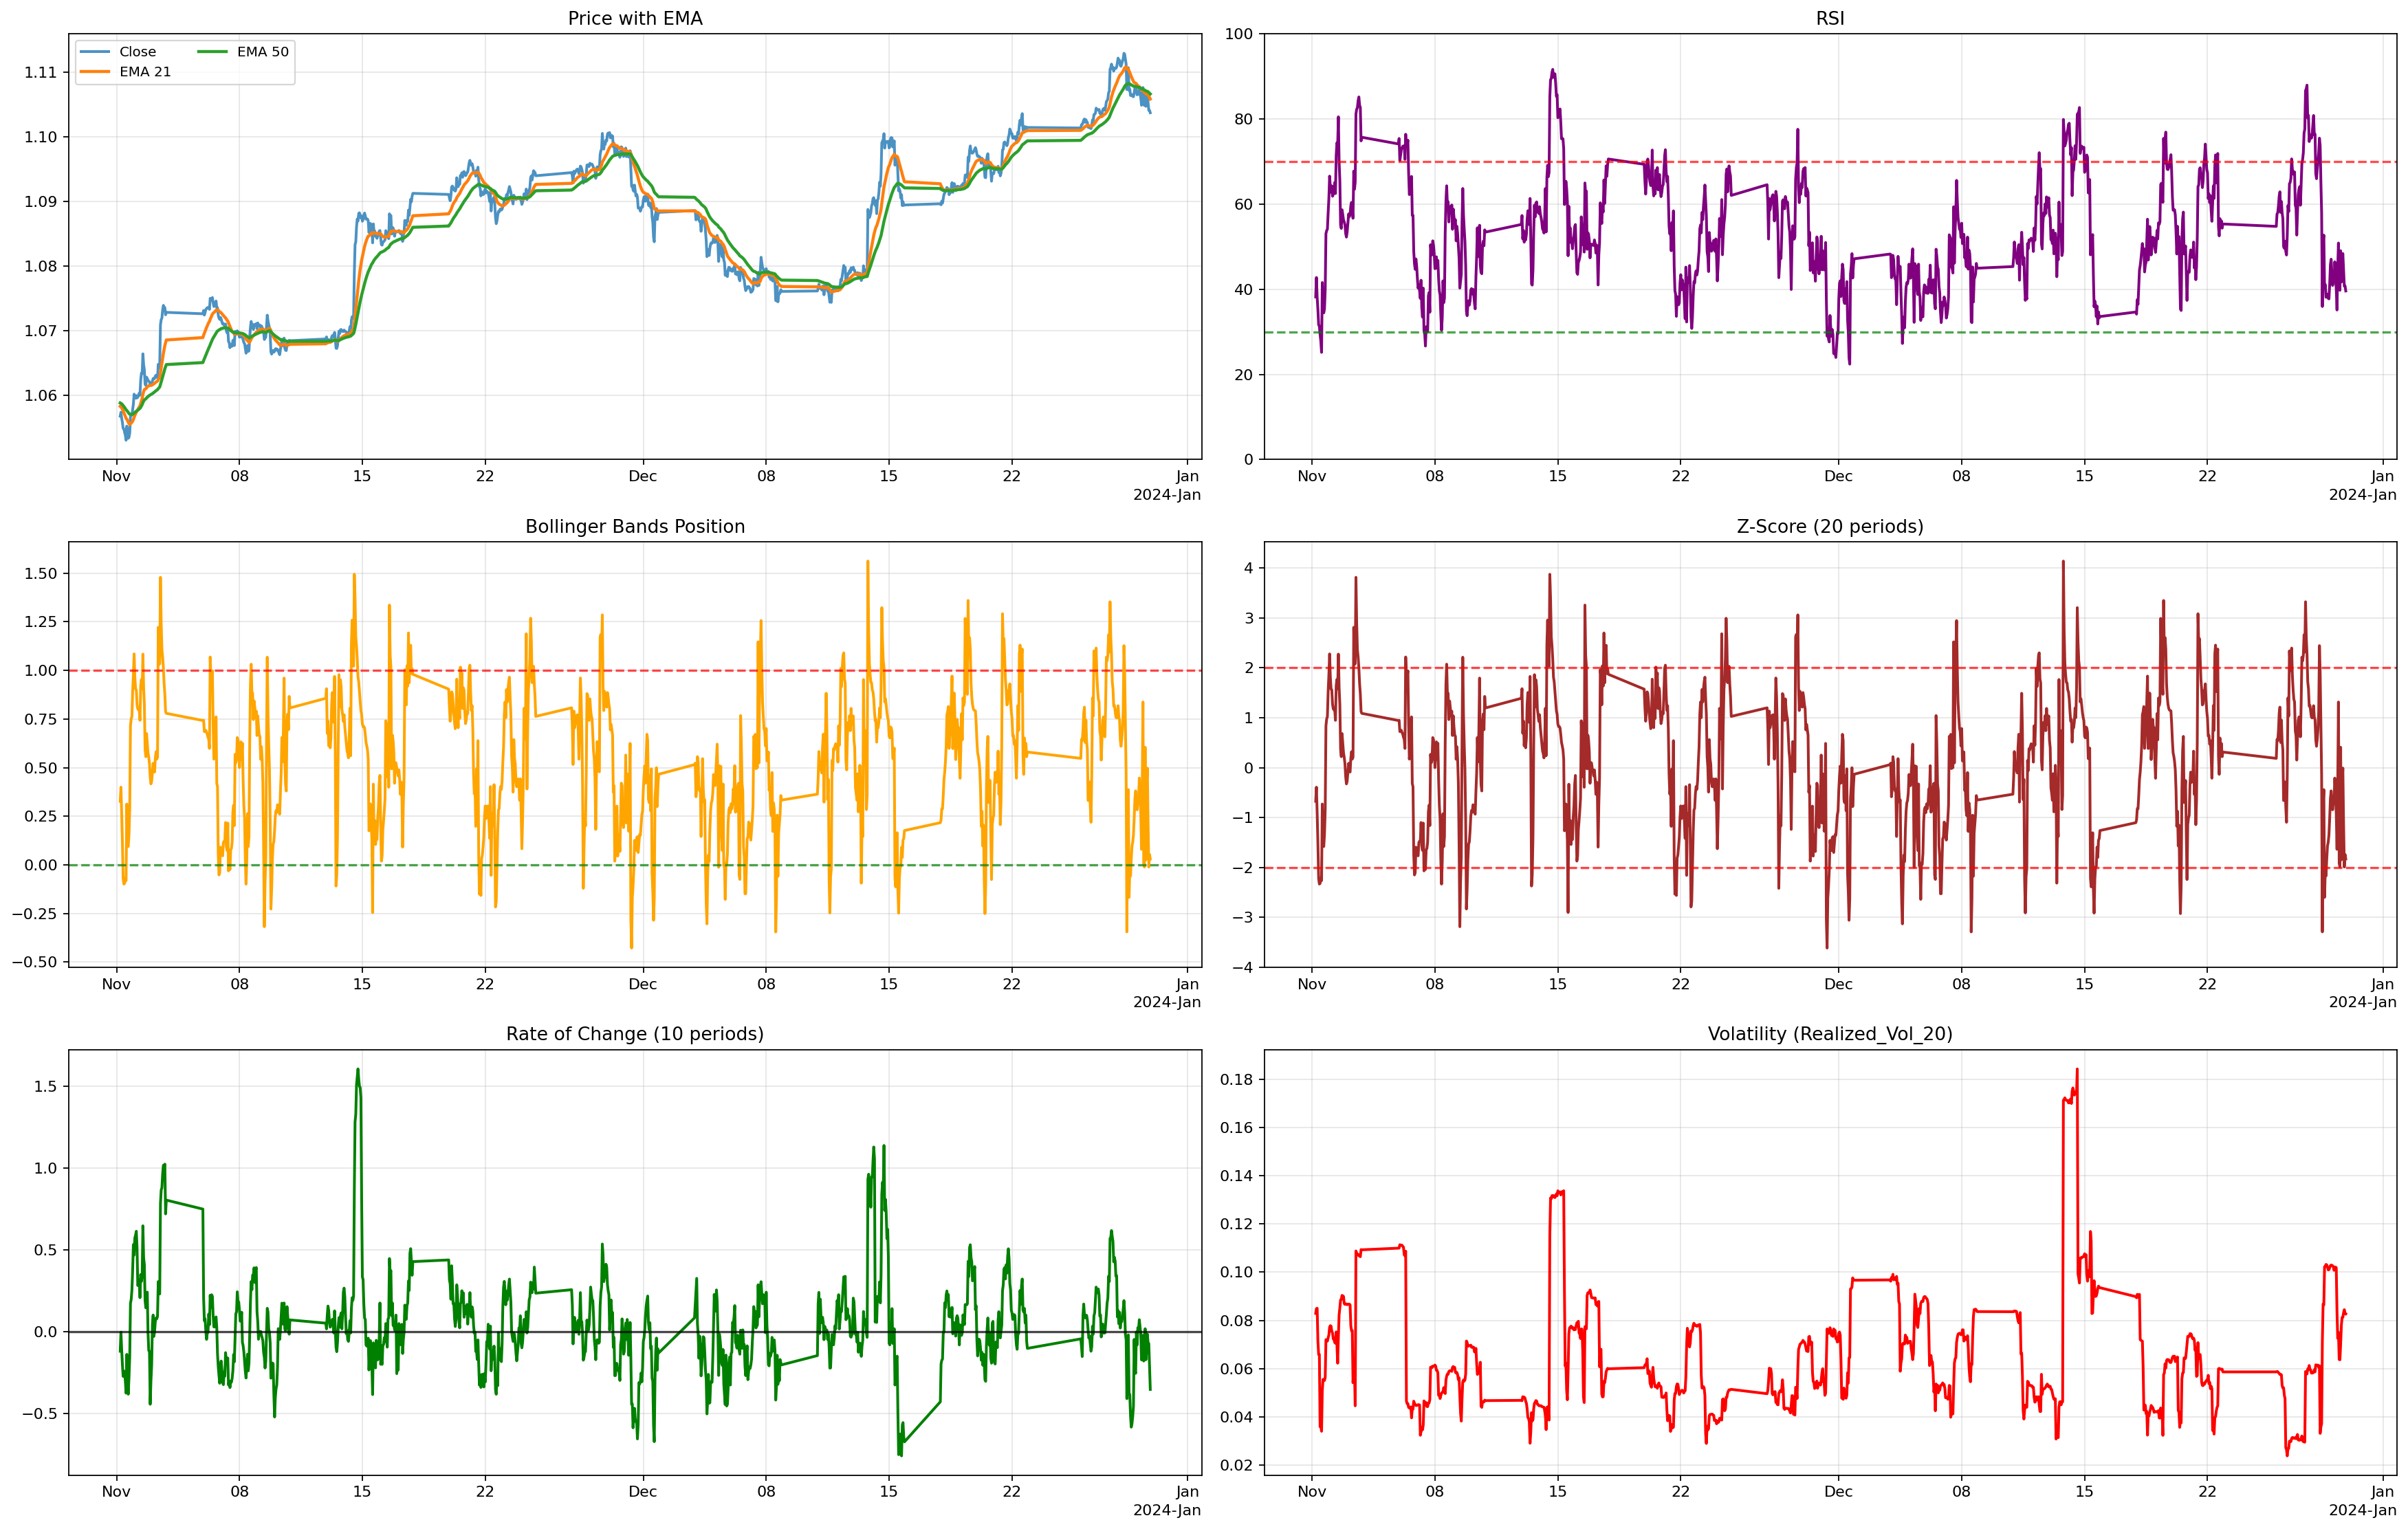

In [11]:
# Визуализация ключевых признаков (улучшенная читаемость)
print("📈 ВИЗУАЛИЗАЦИЯ КЛЮЧЕВЫХ ПРИЗНАКОВ")

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from pathlib import Path

# Гарантируем наличие df_with_features (подгружаем из parquet при холодном запуске ядра)
try:
    df_with_features
except NameError:
    def _find_processed_parquet():
        cwd = Path().resolve()
        candidates = ['eurusd_features.parquet', 'eurusd_features_demo.parquet']
        for base in [cwd] + list(cwd.parents):
            processed_dir = base / '01_data' / 'processed'
            if processed_dir.exists():
                for name in candidates:
                    p = processed_dir / name
                    if p.exists():
                        return p
        return None
    parquet_file = _find_processed_parquet()
    if parquet_file is None:
        raise FileNotFoundError("Не найден parquet в '01_data/processed'. Сначала выполните пайплайн или укажите путь вручную.")
    df_with_features = pd.read_parquet(parquet_file)
    print(f"ℹ️ Загружен датасет: {parquet_file} {df_with_features.shape}")

# Выберем последние 1000 записей для лучшей видимости
plot_data = df_with_features.tail(1000)

fig, axes = plt.subplots(3, 2, figsize=(22, 14), dpi=160)

date_locator = mdates.AutoDateLocator()
date_formatter = mdates.ConciseDateFormatter(date_locator)

# 1. Цена с EMA
axes[0,0].plot(plot_data.index, plot_data['Close'], label='Close', alpha=0.8, linewidth=1.8)
if 'EMA_21' in plot_data.columns:
    axes[0,0].plot(plot_data.index, plot_data['EMA_21'], label='EMA 21', linewidth=2.0)
if 'EMA_50' in plot_data.columns:
    axes[0,0].plot(plot_data.index, plot_data['EMA_50'], label='EMA 50', linewidth=2.0)
axes[0,0].set_title('Price with EMA')
axes[0,0].legend(loc='upper left', fontsize=9, ncol=2)
axes[0,0].grid(True, alpha=0.3)
axes[0,0].xaxis.set_major_locator(date_locator)
axes[0,0].xaxis.set_major_formatter(date_formatter)
axes[0,0].tick_params(axis='x', rotation=0)

# 2. RSI
if 'RSI' in plot_data.columns:
    axes[0,1].plot(plot_data.index, plot_data['RSI'], color='purple', linewidth=1.8)
    axes[0,1].axhline(y=70, color='r', linestyle='--', alpha=0.7)
    axes[0,1].axhline(y=30, color='g', linestyle='--', alpha=0.7)
    axes[0,1].set_title('RSI')
    axes[0,1].set_ylim(0, 100)
    axes[0,1].grid(True, alpha=0.3)
    axes[0,1].xaxis.set_major_locator(date_locator)
    axes[0,1].xaxis.set_major_formatter(date_formatter)
    axes[0,1].tick_params(axis='x', rotation=0)

# 3. Bollinger Bands Position
if 'BB_Position' in plot_data.columns:
    axes[1,0].plot(plot_data.index, plot_data['BB_Position'], color='orange', linewidth=1.8)
    axes[1,0].axhline(y=1, color='r', linestyle='--', alpha=0.7)
    axes[1,0].axhline(y=0, color='g', linestyle='--', alpha=0.7)
    axes[1,0].set_title('Bollinger Bands Position')
    axes[1,0].grid(True, alpha=0.3)
    axes[1,0].xaxis.set_major_locator(date_locator)
    axes[1,0].xaxis.set_major_formatter(date_formatter)
    axes[1,0].tick_params(axis='x', rotation=0)

# 4. Z-Score
if 'ZScore_20' in plot_data.columns:
    axes[1,1].plot(plot_data.index, plot_data['ZScore_20'], color='brown', linewidth=1.8)
    axes[1,1].axhline(y=2, color='r', linestyle='--', alpha=0.7)
    axes[1,1].axhline(y=-2, color='r', linestyle='--', alpha=0.7)
    axes[1,1].set_title('Z-Score (20 periods)')
    axes[1,1].grid(True, alpha=0.3)
    axes[1,1].xaxis.set_major_locator(date_locator)
    axes[1,1].xaxis.set_major_formatter(date_formatter)
    axes[1,1].tick_params(axis='x', rotation=0)

# 5. ROC
if 'ROC_10' in plot_data.columns:
    axes[2,0].plot(plot_data.index, plot_data['ROC_10'], color='green', linewidth=1.8)
    axes[2,0].axhline(y=0, color='black', linestyle='-', alpha=0.7)
    axes[2,0].set_title('Rate of Change (10 periods)')
    axes[2,0].grid(True, alpha=0.3)
    axes[2,0].xaxis.set_major_locator(date_locator)
    axes[2,0].xaxis.set_major_formatter(date_formatter)
    axes[2,0].tick_params(axis='x', rotation=0)

# 6. Volatility
vol_col = None
for col in ['Realized_Vol_20', 'ATR']:
    if col in plot_data.columns:
        vol_col = col
        break

if vol_col:
    axes[2,1].plot(plot_data.index, plot_data[vol_col], color='red', linewidth=1.8)
    axes[2,1].set_title(f'Volatility ({vol_col})')
    axes[2,1].grid(True, alpha=0.3)
    axes[2,1].xaxis.set_major_locator(date_locator)
    axes[2,1].xaxis.set_major_formatter(date_formatter)
    axes[2,1].tick_params(axis='x', rotation=0)

# Сохранение графика в images/feature_analysis
images_base = Path(project_root) / '01_data' / 'interim' / 'images'
features_dir = images_base / 'feature_analysis'
features_dir.mkdir(parents=True, exist_ok=True)

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
fig_path = features_dir / f"fig_ключевые_признаки_{timestamp}.png"

plt.tight_layout()
plt.savefig(fig_path, dpi=160, bbox_inches='tight')
print(f"💾 Сохранено: {fig_path}")
plt.show()


🔗 КОРРЕЛЯЦИОННЫЙ АНАЛИЗ


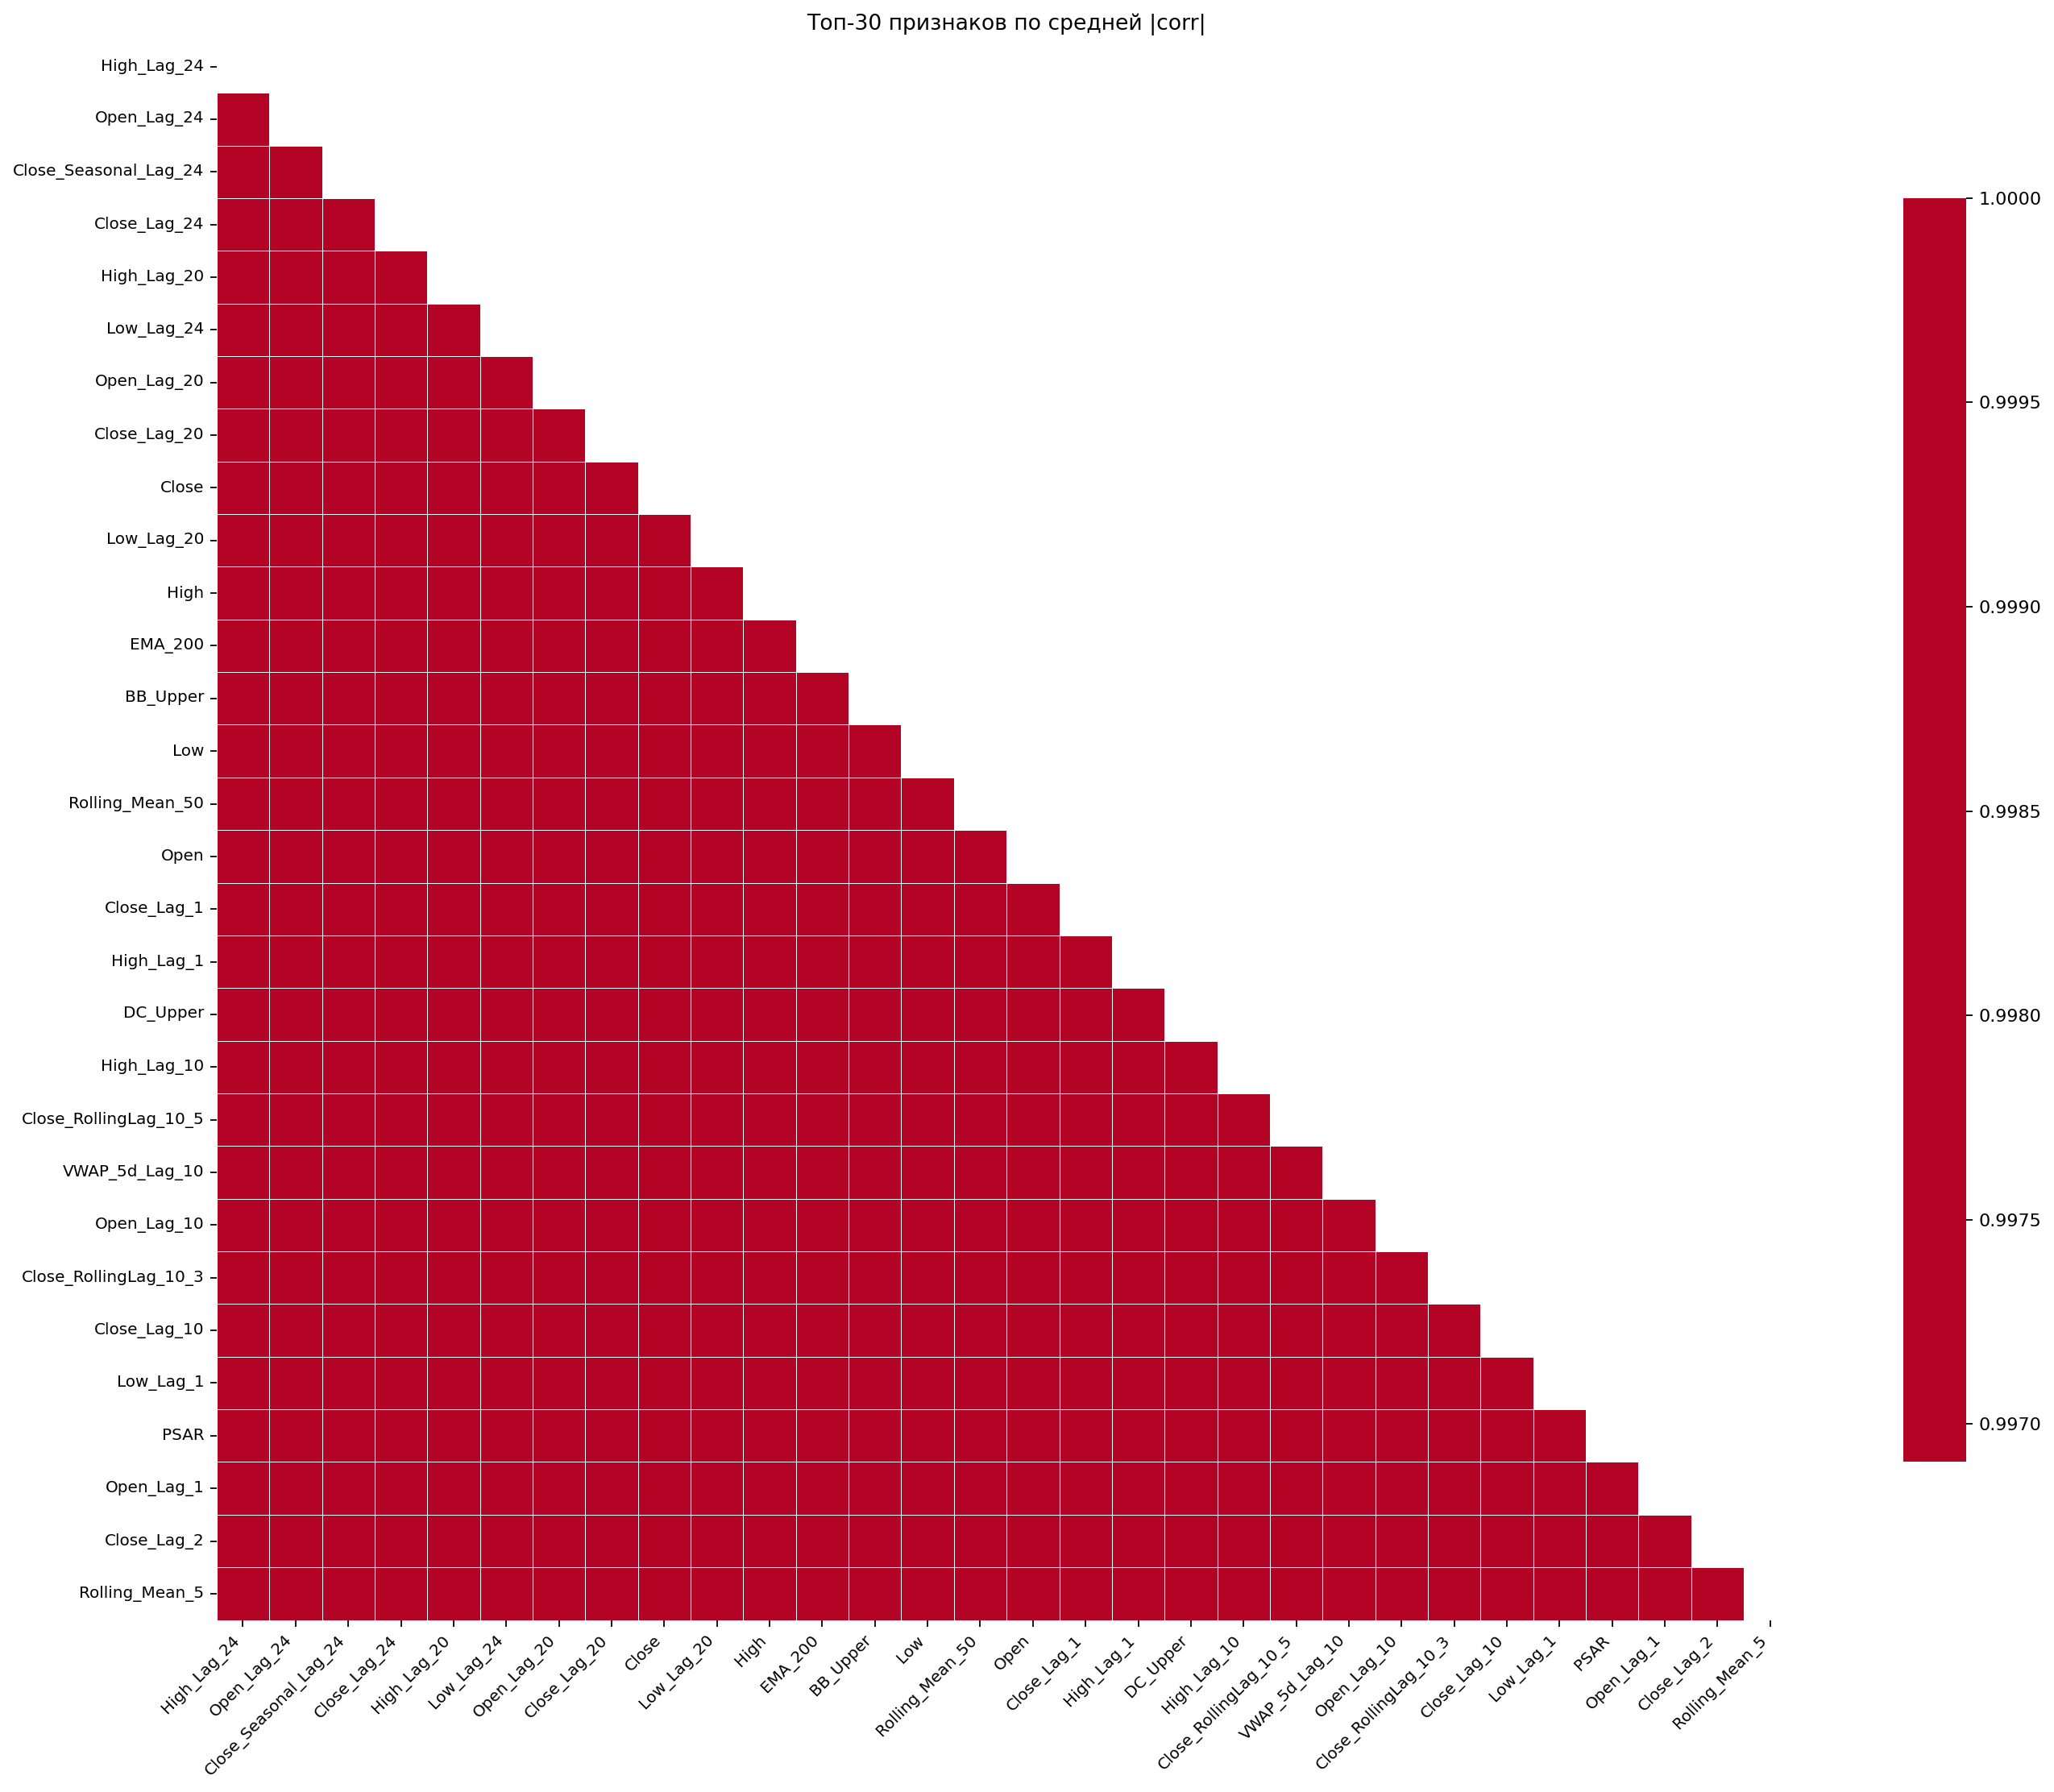

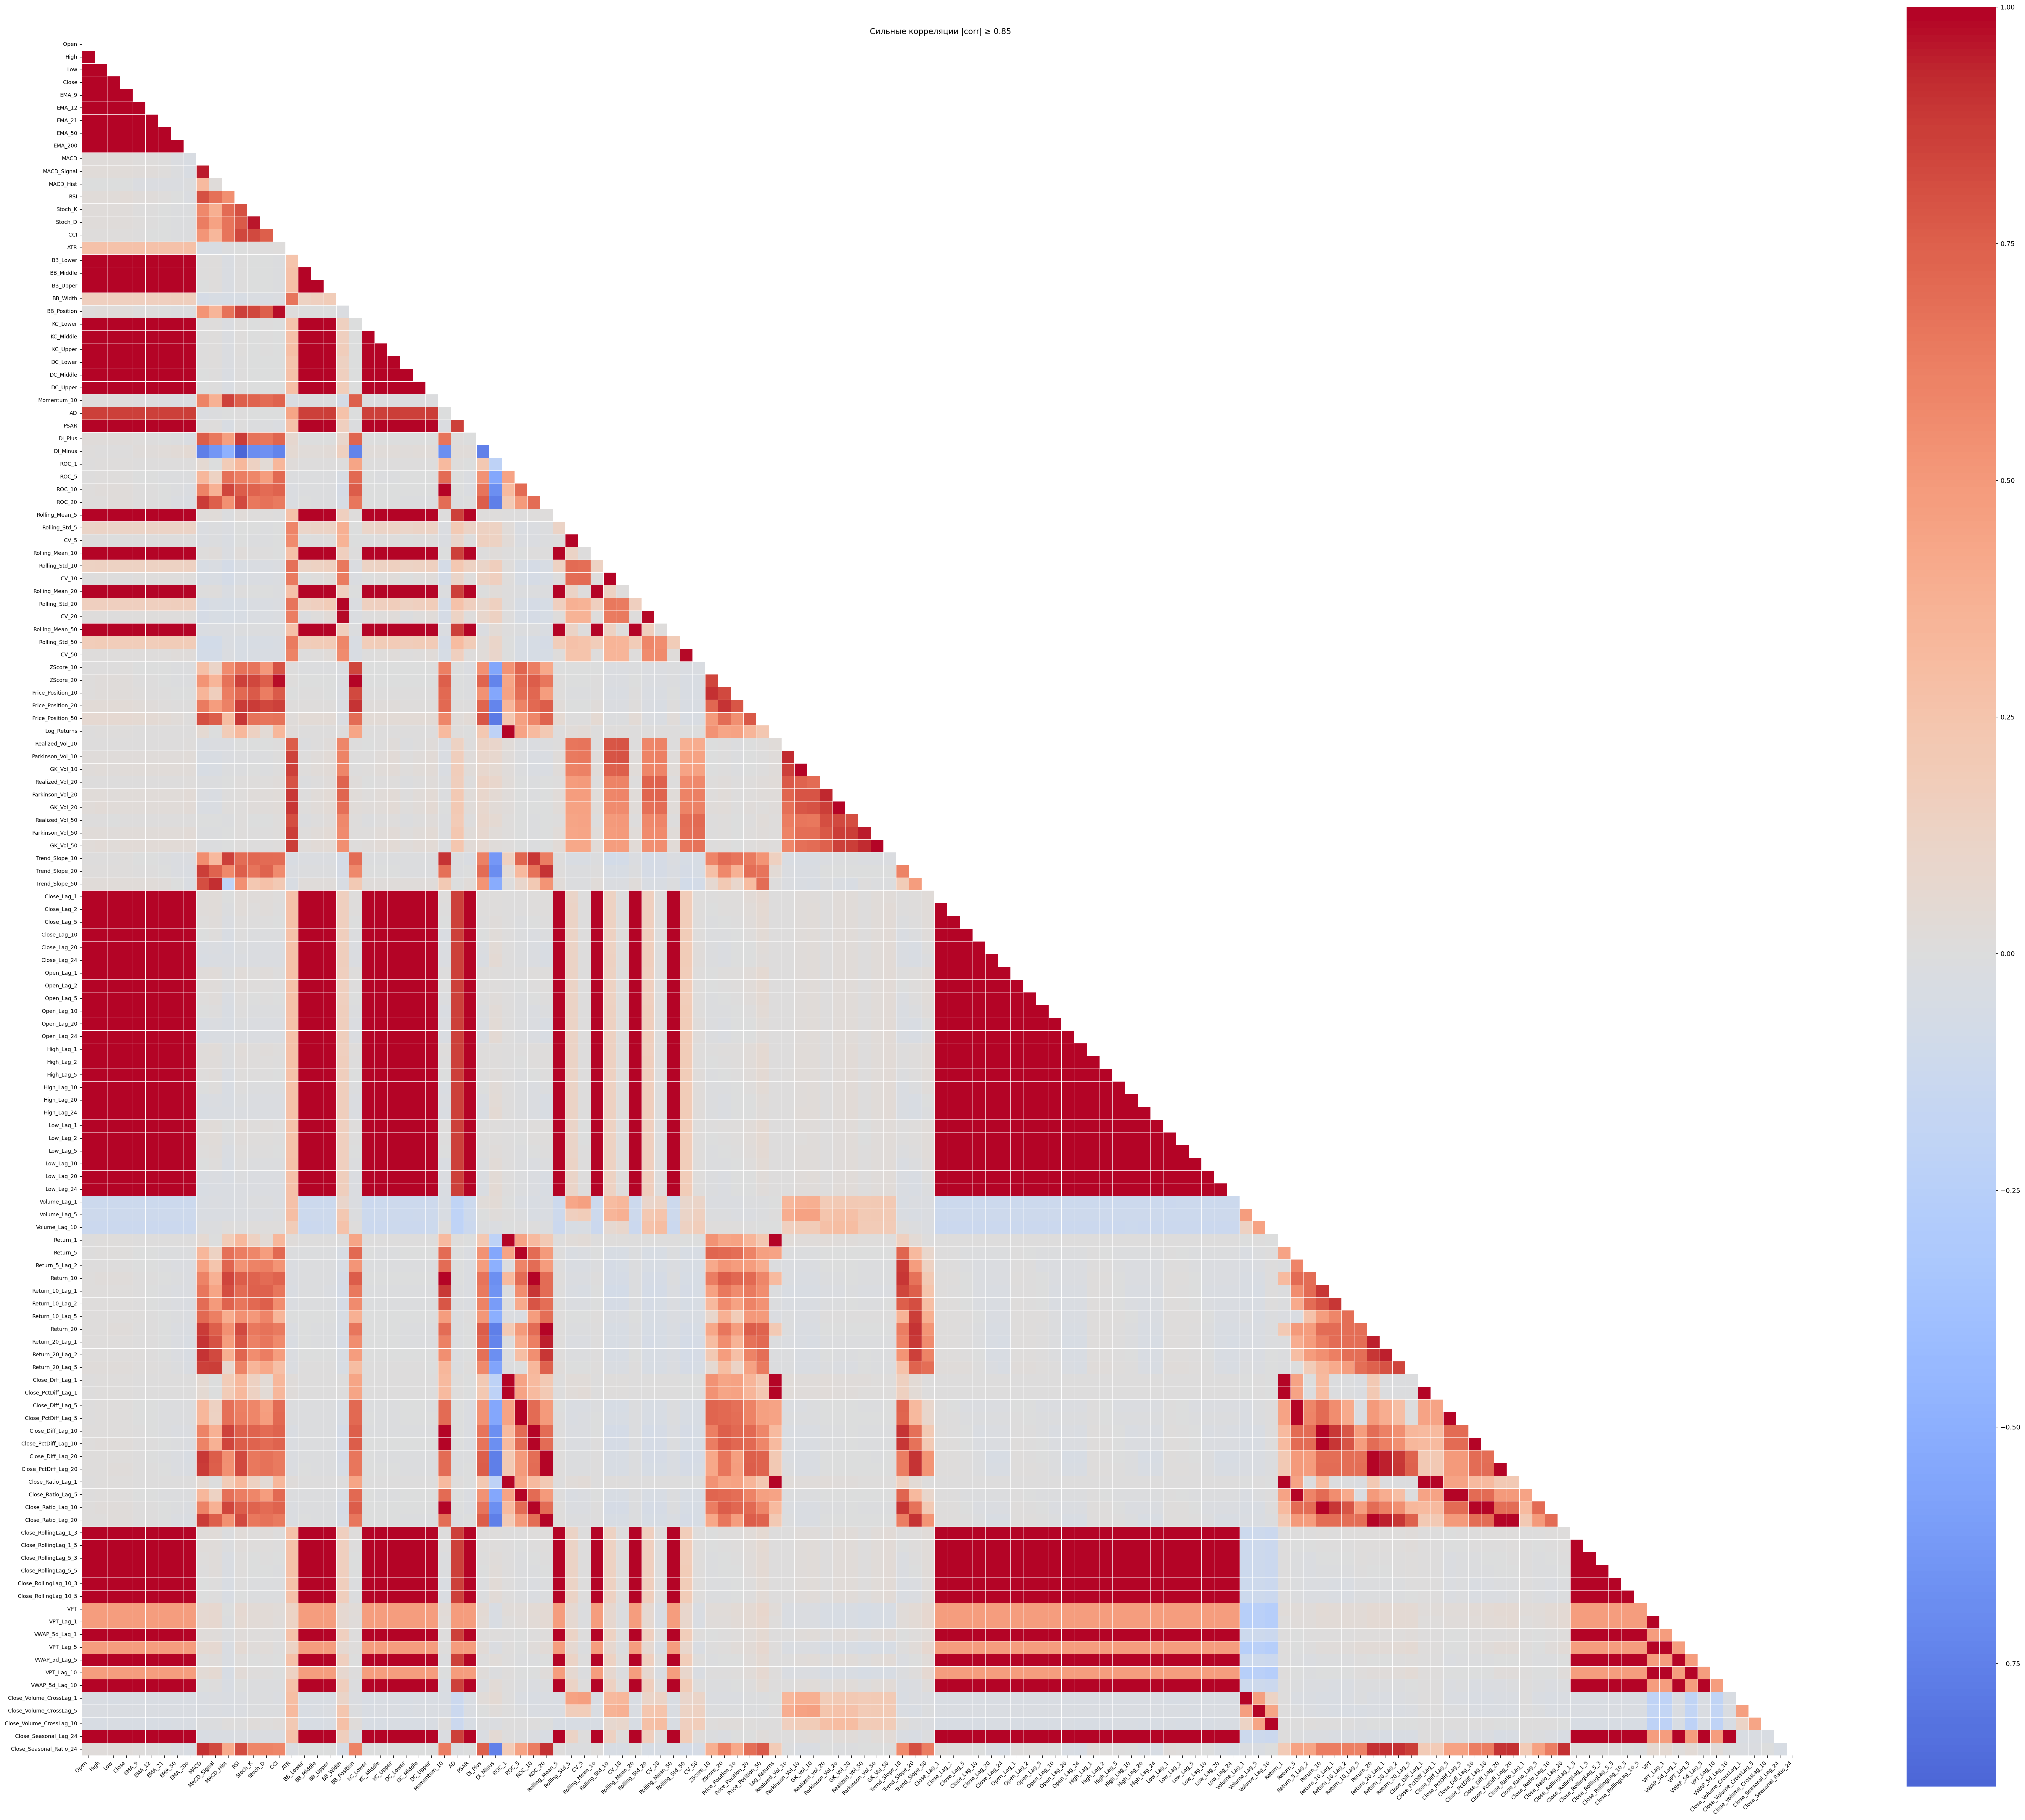


Топ-50 коррелирующих пар (по |corr|):
  ROC_10 ↔ Close_Ratio_Lag_10: 1.000
  Close_PctDiff_Lag_10 ↔ Close_Ratio_Lag_10: 1.000
  ROC_20 ↔ Return_20: 1.000
  Return_20 ↔ Close_PctDiff_Lag_20: 1.000
  ROC_10 ↔ Return_10: 1.000
  Return_10 ↔ Close_PctDiff_Lag_10: 1.000
  ROC_5 ↔ Close_Ratio_Lag_5: 1.000
  ROC_20 ↔ Close_Ratio_Lag_20: 1.000
  Close_PctDiff_Lag_5 ↔ Close_Ratio_Lag_5: 1.000
  Close_PctDiff_Lag_20 ↔ Close_Ratio_Lag_20: 1.000
  ROC_5 ↔ Return_5: 1.000
  Return_5 ↔ Close_PctDiff_Lag_5: 1.000
  Return_5 ↔ Close_Ratio_Lag_5: 1.000
  Return_10 ↔ Close_Ratio_Lag_10: 1.000
  Return_1 ↔ Close_Ratio_Lag_1: 1.000
  BB_Middle ↔ Rolling_Mean_20: 1.000
  Momentum_10 ↔ Close_Diff_Lag_10: 1.000
  ROC_1 ↔ Close_PctDiff_Lag_1: 1.000
  ROC_5 ↔ Close_PctDiff_Lag_5: 1.000
  ROC_10 ↔ Close_PctDiff_Lag_10: 1.000
  ROC_20 ↔ Close_PctDiff_Lag_20: 1.000
  Close_Lag_24 ↔ Close_Seasonal_Lag_24: 1.000
  ROC_1 ↔ Return_1: 1.000
  Return_1 ↔ Close_PctDiff_Lag_1: 1.000
  Return_20 ↔ Close_Ratio_Lag_20: 1.0

In [12]:
# Корреляционный анализ (все признаки без "каши")
print("🔗 КОРРЕЛЯЦИОННЫЙ АНАЛИЗ")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Гарантируем наличие df_with_features (подгружаем из parquet при холодном запуске ядра)
try:
    df_with_features
except NameError:
    def _find_processed_parquet():
        cwd = Path().resolve()
        candidates = ['eurusd_features.parquet', 'eurusd_features_demo.parquet']
        for base in [cwd] + list(cwd.parents):
            processed_dir = base / '01_data' / 'processed'
            if processed_dir.exists():
                for name in candidates:
                    p = processed_dir / name
                    if p.exists():
                        return p
        return None
    parquet_file = _find_processed_parquet()
    if parquet_file is None:
        raise FileNotFoundError("Не найден parquet в '01_data/processed'. Сначала выполните пайплайн или укажите путь вручную.")
    df_with_features = pd.read_parquet(parquet_file)
    print(f"ℹ️ Загружен датасет: {parquet_file} {df_with_features.shape}")

# Берём только числовые признаки
numeric_df = df_with_features.select_dtypes(include=[np.number]).copy()

# Сэмплирование для ускорения (если очень большой набор)
if len(numeric_df) > 20000:
    numeric_df_sample = numeric_df.sample(20000, random_state=42)
else:
    numeric_df_sample = numeric_df

# Полная матрица корреляций
corr_full = numeric_df_sample.corr()

# 1) Обзор топ-30 признаков с наибольшей средней |corr| (кроме автокорреляции)
mean_abs_corr = corr_full.abs()
np.fill_diagonal(mean_abs_corr.values, np.nan)
mean_strength = mean_abs_corr.mean().sort_values(ascending=False)

top_n = 30
top_features = mean_strength.head(min(top_n, len(mean_strength))).index
corr_top = corr_full.loc[top_features, top_features]

plt.figure(figsize=(18, 14), dpi=160)
mask = np.triu(np.ones_like(corr_top, dtype=bool))
sns.heatmap(corr_top, mask=mask, cmap='coolwarm', center=0, square=True,
            linewidths=0.4, cbar_kws={"shrink": 0.8})
plt.title(f'Топ-{len(top_features)} признаков по средней |corr|')
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()

# 2) Теплокарта только сильных связей (|corr| >= 0.85)
threshold = 0.85
strong_mask = mean_abs_corr >= threshold
np.fill_diagonal(strong_mask.values, False)
strong_cols = strong_mask.any(axis=0)
strong_rows = strong_mask.any(axis=1)

strong_features = mean_abs_corr.columns[strong_cols | strong_rows]

if len(strong_features) > 1:
    corr_strong = corr_full.loc[strong_features, strong_features]
    plt.figure(figsize=(max(12, 0.35*len(strong_features)), max(10, 0.35*len(strong_features))), dpi=160)
    mask = np.triu(np.ones_like(corr_strong, dtype=bool))
    sns.heatmap(corr_strong, mask=mask, cmap='coolwarm', center=0, square=True,
                linewidths=0.4, cbar_kws={"shrink": 0.8})
    plt.title(f'Сильные корреляции |corr| ≥ {threshold}')
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.yticks(rotation=0, fontsize=8)
    plt.tight_layout()
    plt.show()
else:
    print(f"Сильные корреляции (|corr| ≥ {threshold}) не найдены.")

# 3) Таблица топ-50 пар по |corr|
pairs = []
cols = corr_full.columns
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        pairs.append((cols[i], cols[j], corr_full.iloc[i, j]))

pairs_sorted = sorted(pairs, key=lambda x: abs(x[2]), reverse=True)
print("\nТоп-50 коррелирующих пар (по |corr|):")
for col1, col2, c in pairs_sorted[:50]:
    print(f"  {col1} ↔ {col2}: {c:.3f}")


In [ ]:
# Сохранение графиков из корреляционного анализа в images/correlation_analysis
from pathlib import Path
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Базовая папка изображений
images_base = Path(project_root) / '01_data' / 'interim' / 'images'
corr_dir = images_base / 'correlation_analysis'
corr_dir.mkdir(parents=True, exist_ok=True)

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Если переменные не существуют (ячейка анализа не была выполнена), пересчитаем кратко
if not all(k in globals() for k in ('corr_full', 'mean_abs_corr', 'top_features')):
    import pandas as pd
    # гарантируем датасет
    if 'df_with_features' not in globals():
        from pathlib import Path as _P
        def _find_processed_parquet():
            cwd = _P().resolve()
            candidates = ['eurusd_features.parquet', 'eurusd_features_demo.parquet']
            for base in [cwd] + list(cwd.parents):
                processed_dir = base / '01_data' / 'processed'
                if processed_dir.exists():
                    for name in candidates:
                        p = processed_dir / name
                        if p.exists():
                            return p
            return None
        parquet_file = _find_processed_parquet()
        if parquet_file is None:
            raise FileNotFoundError("Не найден parquet в '01_data/processed'. Выполните пайплайн или укажите путь вручную.")
        df_with_features = pd.read_parquet(parquet_file)

    numeric_df = df_with_features.select_dtypes(include=[np.number]).copy()
    if len(numeric_df) > 20000:
        numeric_df_sample = numeric_df.sample(20000, random_state=42)
    else:
        numeric_df_sample = numeric_df
    corr_full = numeric_df_sample.corr()
    mean_abs_corr = corr_full.abs()
    np.fill_diagonal(mean_abs_corr.values, np.nan)
    mean_strength = mean_abs_corr.mean().sort_values(ascending=False)
    top_n = 30
    top_features = mean_strength.head(min(top_n, len(mean_strength))).index

# 1) Теплокарта топовых признаков
corr_top = corr_full.loc[top_features, top_features]
plt.figure(figsize=(18, 14), dpi=160)
mask = np.triu(np.ones_like(corr_top, dtype=bool))
sns.heatmap(corr_top, mask=mask, cmap='coolwarm', center=0, square=True,
            linewidths=0.4, cbar_kws={"shrink": 0.8})
plt.title(f'Топ-{len(top_features)} признаков по средней |corr|')
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
fig1_path = corr_dir / f"fig_corr_top_{len(top_features)}_{timestamp}.png"
plt.savefig(fig1_path, dpi=160, bbox_inches='tight')
print(f"💾 Сохранено: {fig1_path}")
plt.close()

# 2) Теплокарта сильных корреляций (если есть)
threshold = 0.85
strong_mask = mean_abs_corr >= threshold
np.fill_diagonal(strong_mask.values, False)
strong_cols = strong_mask.any(axis=0)
strong_rows = strong_mask.any(axis=1)
strong_features = mean_abs_corr.columns[strong_cols | strong_rows]

if len(strong_features) > 1:
    corr_strong = corr_full.loc[strong_features, strong_features]
    plt.figure(figsize=(max(12, 0.35*len(strong_features)), max(10, 0.35*len(strong_features))), dpi=160)
    mask = np.triu(np.ones_like(corr_strong, dtype=bool))
    sns.heatmap(corr_strong, mask=mask, cmap='coolwarm', center=0, square=True,
                linewidths=0.4, cbar_kws={"shrink": 0.8})
    plt.title(f'Сильные корреляции |corr| ≥ {threshold}')
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.yticks(rotation=0, fontsize=8)
    plt.tight_layout()
    fig2_path = corr_dir / f"fig_corr_strong_ge_{threshold}_{timestamp}.png"
    plt.savefig(fig2_path, dpi=160, bbox_inches='tight')
    print(f"💾 Сохранено: {fig2_path}")
    plt.close()
else:
    print(f"Сильные корреляции (|corr| ≥ {threshold}) не найдены — сохранение пропущено.")



💾 Сохранено: C:\Users\Shchurov\Хранилище\Документы\05_Программирование\02_projects\personal\trading_predictor\01_data\interim\images\correlation_analysis\fig_corr_top_30_20250808_135537.png
💾 Сохранено: C:\Users\Shchurov\Хранилище\Документы\05_Программирование\02_projects\personal\trading_predictor\01_data\interim\images\correlation_analysis\fig_corr_strong_ge_0.85_20250808_135537.png


In [10]:
# Финальная сводка и следующие шаги
print("🎉 FEATURE ENGINEERING ЗАВЕРШЕН!")
print("=" * 50)

print(f"✅ Результаты:")
print(f"  • Создано признаков: {stats['created_features']}")
print(f"  • Итого колонок: {stats['total_columns']}")  
print(f"  • Время выполнения: {stats['processing_time']:.2f} сек")
print(f"  • Размер данных: {df_with_features.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\n💾 Сохранено в:")
print(f"  • 01_data/processed/eurusd_features.parquet (полный)")
print(f"  • 01_data/processed/eurusd_features_demo.parquet (демо)")

print(f"\n🚀 Готово для:")
print(f"  • Feature Selection")
print(f"  • Обучения ML моделей")
print(f"  • Создания торговых стратегий")
print(f"  • Бэктестинга")

print(f"\n📈 Следующие шаги:")
print(f"  1. Анализ важности признаков")
print(f"  2. Feature Selection (удаление избыточных)")
print(f"  3. Создание целевых переменных")
print(f"  4. Обучение моделей (LSTM, XGBoost, etc.)")
print(f"  5. Валидация и тестирование")

print(f"\n🎯 Используйте df_with_features для дальнейшей работы!")
print(f"Данные готовы к использованию в ML пайплайнах! 🔥")


🎉 FEATURE ENGINEERING ЗАВЕРШЕН!
✅ Результаты:
  • Создано признаков: 177
  • Итого колонок: 182
  • Время выполнения: 791.97 сек
  • Размер данных: 122.42 MB

💾 Сохранено в:
  • 01_data/processed/eurusd_features.parquet (полный)
  • 01_data/processed/eurusd_features_demo.parquet (демо)

🚀 Готово для:
  • Feature Selection
  • Обучения ML моделей
  • Создания торговых стратегий
  • Бэктестинга

📈 Следующие шаги:
  1. Анализ важности признаков
  2. Feature Selection (удаление избыточных)
  3. Создание целевых переменных
  4. Обучение моделей (LSTM, XGBoost, etc.)
  5. Валидация и тестирование

🎯 Используйте df_with_features для дальнейшей работы!
Данные готовы к использованию в ML пайплайнах! 🔥
